In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import QuantileTransformer

In [3]:
df = pd.read_csv('./data/titanic_clean.csv')

In [12]:
label_sex = LabelEncoder()
label_embarked = LabelEncoder()

df['Sex'] = label_sex.fit_transform(df['Sex'])
df['Embarked'] = label_embarked.fit_transform(df['Embarked'])

In [ ]:
df.sample(5)

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
836         0       3    1  21.0      0      0   8.6625         2
144         0       2    1  18.0      0      0  11.5000         2
90          0       3    1  29.0      0      0   8.0500         2
479         1       3    0   2.0      0      1  12.2875         2
402         0       3    0  21.0      1      0   9.8250         2

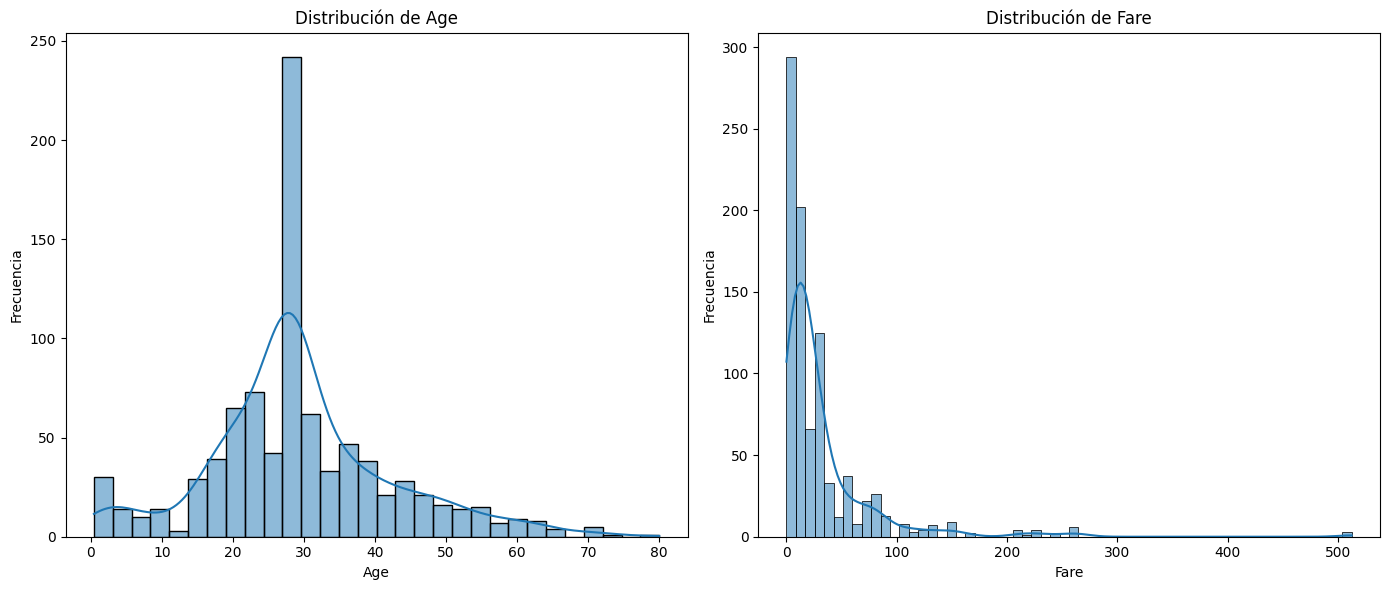

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(df['Age'].dropna(), kde=True, ax=axes[0])
axes[0].set_title('Distribución de Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frecuencia')

# Gráfica de la distribución de Fare
sns.histplot(df['Fare'].dropna(), kde=True, ax=axes[1])
axes[1].set_title('Distribución de Fare')
axes[1].set_xlabel('Fare')
axes[1].set_ylabel('Frecuencia')

# Mostrar las gráficas
plt.tight_layout()
plt.show()

In [17]:
qun_tra_age = QuantileTransformer(output_distribution = 'normal', n_quantiles=500)
qun_tra_fare = QuantileTransformer(output_distribution = 'normal', n_quantiles=500)

df['Age'] = qun_tra_age.fit_transform(df[['Age']])
df['Fare'] = qun_tra_fare.fit_transform(df[['Fare']])

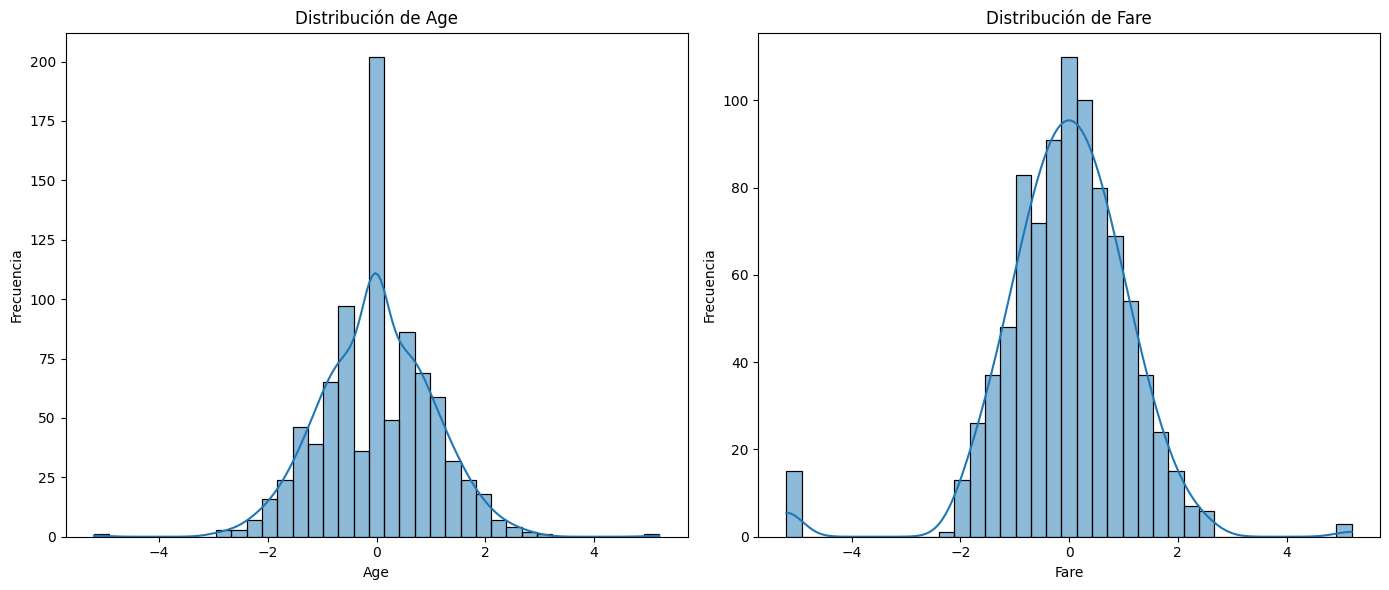

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(df['Age'].dropna(), kde=True, ax=axes[0])
axes[0].set_title('Distribución de Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frecuencia')

# Gráfica de la distribución de Fare
sns.histplot(df['Fare'].dropna(), kde=True, ax=axes[1])
axes[1].set_title('Distribución de Fare')
axes[1].set_xlabel('Fare')
axes[1].set_ylabel('Frecuencia')

# Mostrar las gráficas
plt.tight_layout()
plt.show()

In [19]:
mms_pclass= MinMaxScaler()
mms_sex = MinMaxScaler()
mms_age = MinMaxScaler()
mms_sibsp = MinMaxScaler()
mms_parch = MinMaxScaler()
mms_fare = MinMaxScaler()
mms_embarked = MinMaxScaler()

# Ejecutar transformaciones
df['Pclass'] = mms_pclass.fit_transform(df[['Pclass']])
df['Sex'] = mms_sex.fit_transform(df[['Sex']])
df['Age'] = mms_age.fit_transform(df[['Age']])
df['SibSp'] = mms_sibsp.fit_transform(df[['SibSp']])
df['Parch'] = mms_parch.fit_transform(df[['Parch']])
df['Fare'] = mms_fare.fit_transform(df[['Fare']])
df['Embarked'] = mms_embarked.fit_transform(df[['Embarked']])

In [20]:
df.to_csv('./data/titanic_procesado.csv', index=False)

In [21]:
df.sample(5)

Survived  Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
633         0     0.0  1.0  0.497826  0.000    0.0  0.000000       1.0
474         0     1.0  0.0  0.433152  0.000    0.0  0.469218       1.0
62          0     0.0  1.0  0.612399  0.125    0.0  0.638892       1.0
227         0     1.0  1.0  0.419471  0.000    0.0  0.368146       1.0
628         0     1.0  1.0  0.462346  0.000    0.0  0.428458       1.0